In [73]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [84]:
data = load_breast_cancer()



In [85]:
data_df = pd.DataFrame(data.data, columns=data.feature_names)

In [86]:
data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [87]:
data_target_df = pd.Series(data.target, name='result')
data_target_df

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: result, Length: 569, dtype: int32

In [88]:
data_df = pd.concat([data_df,data_target_df], axis=1)

In [79]:
data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [92]:
data_df.loc[data_df['result'] == 1].shape

(357, 31)

In [35]:
print(data.data.shape)
print(data.target_names)
print(data.feature_names)
print(data.feature_names.shape)

(569, 30)
['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(30,)


In [16]:
rfc = RandomForestClassifier(n_estimators=100, random_state=90)
score_pre = cross_val_score(rfc, data.data, data.target, cv=10).mean()

score_pre

0.9648809523809524

0.9631265664160402 71


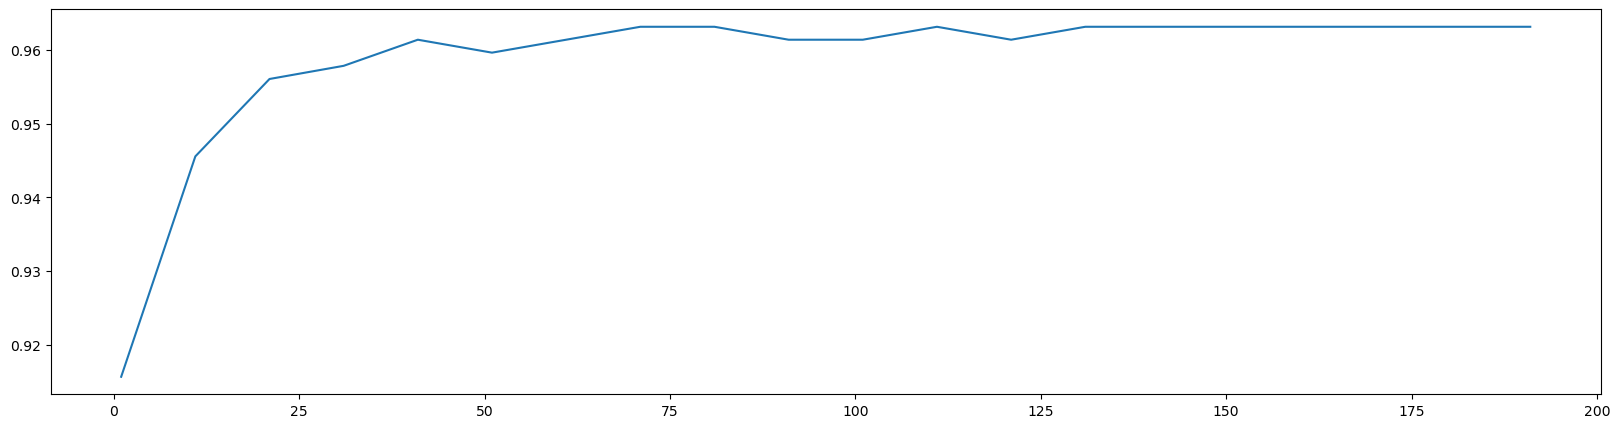

In [19]:
# 获取estimators 调参参数
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=90
                                )
    score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
    scorel.append(score)

print(max(scorel), (scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10), scorel)
plt.show()

0.9666353383458647 72


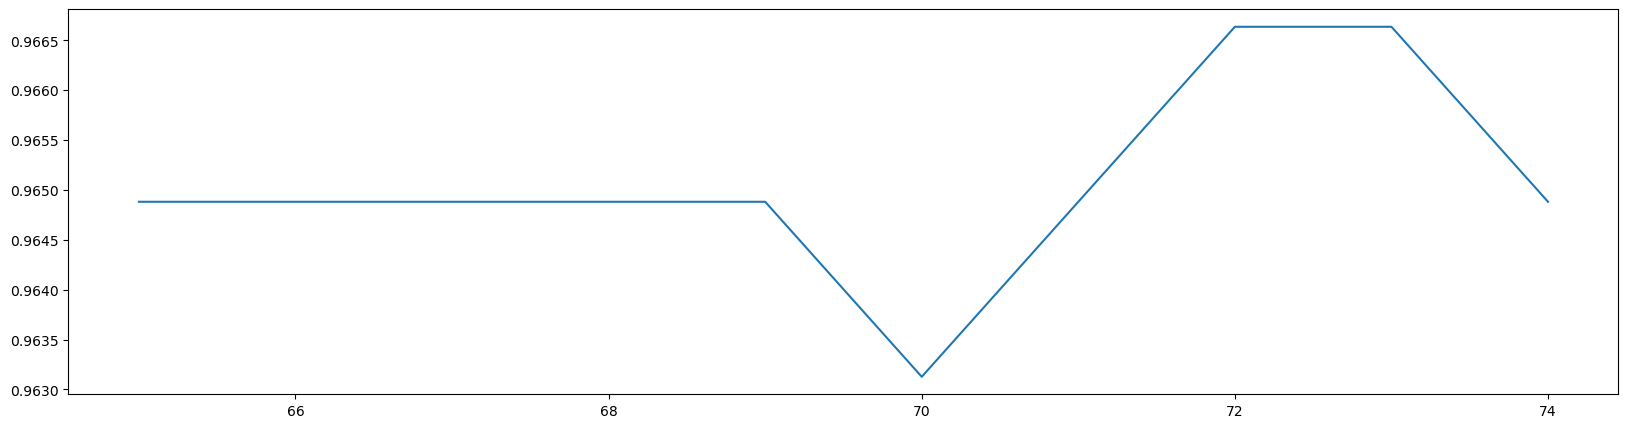

In [21]:
# 二次细分
scorel_2 = []
for i in range(65,75):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=90
                                )
    score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
    scorel_2.append(score)

print(max(scorel_2), ([*range(65,75)][scorel_2.index(max(scorel_2))]))
plt.figure(figsize=[20,5])
plt.plot(range(65,75), scorel_2)
plt.show()

In [ ]:
# 调整max_depth 默认none
param_grid = {'max_depth': np.arange(1,20,1)}

rfc = RandomForestClassifier(n_estimators=72
                            ,random_state=90
                            )
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

In [25]:
GS.best_params_

{'max_depth': 8}

In [26]:
GS.best_score_

0.9683897243107771

In [36]:
# 调参 max_features 默认是spart(n_features) 上升提高模型复杂度
param_grid = {'max_features': np.arange(5, 30, 1)}

rfc = RandomForestClassifier(n_estimators=72
                            ,max_depth=8
                            ,random_state=90
                             
                            )
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=8, n_estimators=72,
                                              random_state=90),
             param_grid={'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])})

In [37]:
GS.best_params_

{'max_features': 22}

In [38]:
GS.best_score_

0.968421052631579

In [42]:
rfc = RandomForestClassifier(n_estimators=72
                            ,max_depth=8
                            ,max_features=22
                            ,random_state=90
                             
                            )
rfc = rfc.fit(data.data, data.target)
score = rfc.score(data.data, data.target)

In [43]:
print(score)

1.0


In [44]:
param_grid = {'criterion': ['gini','entropy']}

rfc = RandomForestClassifier(n_estimators=72
                            ,max_depth=8
                            ,max_features=22
                            ,random_state=90
                             
                            )
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=8, max_features=22,
                                              n_estimators=72,
                                              random_state=90),
             param_grid={'criterion': ['gini', 'entropy']})

In [45]:
GS.best_params_

{'criterion': 'gini'}

In [46]:
GS.best_score_

0.968421052631579

In [48]:
rfc = RandomForestClassifier(n_estimators=72
                            ,max_depth=8
                            ,max_features=22
                            ,random_state=90
                            ,criterion='gini'
                            )
score = cross_val_score(rfc, data.data, data.target, cv=10).mean()

score

0.968421052631579

In [49]:
score - score_pre

0.0035401002506265655